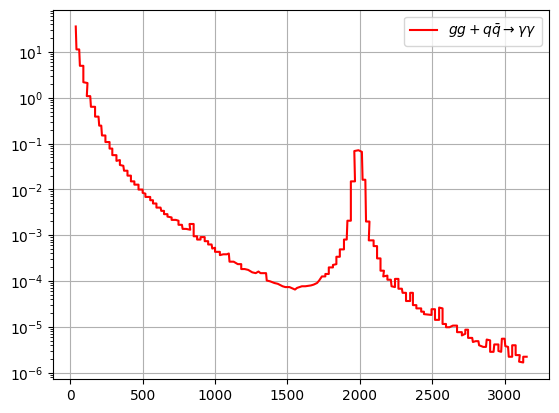

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os
import scipy
from scipy.optimize import curve_fit
from scipy.special import wofz

comparison_csv = './digitized_data/oct 26/photon_both.csv'                   # digitized data from paper

df = np.genfromtxt(comparison_csv, delimiter=',')  # Read-in comparison plot, and generate comparison points with the same x-coords
df_x, df_y = [], []

for i in range(len(df)):
    df_x.append(df[i][0])
    df_y.append( 25 * df[i][1])

fig, ax = plt.subplots()

plt.plot(df_x, df_y, label=r'$gg + q \bar{q} \rightarrow \gamma \gamma$', color='red')
plt.legend(loc='upper right')
plt.yscale('log')
plt.grid('True')
plt.savefig('./Figures/raw.pdf',dpi=100,bbox_inches='tight')

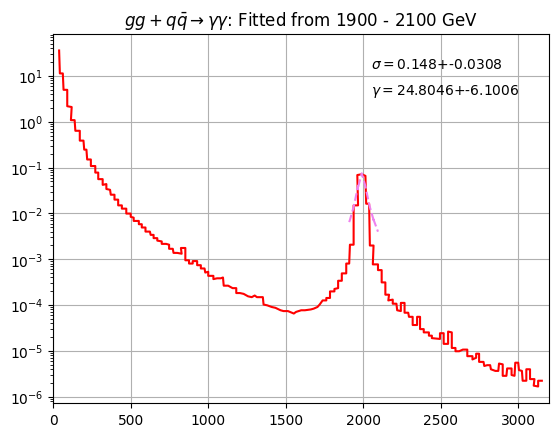

In [64]:
# What part of the curve do you want to fit?

fig, ax = plt.subplots()

lower_bound, upper_bound = 1900, 2100
savename = str(lower_bound) + ' - ' + str(upper_bound)

plt.title(r'$gg + q \bar{q} \rightarrow \gamma \gamma$: Fitted from ' + savename + ' GeV')

x_to_fit, y_to_fit = [], []

for i in range(len(df_x)):
    if df_x[i] > lower_bound and df_x[i] < upper_bound:
        x_to_fit.append(df_x[i])
        y_to_fit.append(df_y[i])

# Get the energy level at peak so we can center the fit
index_of_max = np.argmax(y_to_fit)

# Fit time
def voigt(x, sigma, gamma):   # K, M, sigma, gamma
    M = x_to_fit[index_of_max]
    K = 2 * np.sqrt(2) * M * gamma / math.pi / np.sqrt(M**2 + M*np.sqrt(M**2 + gamma**2))
    z = (x - M + 1j * gamma) / (sigma * np.sqrt(2))
    return K * np.real(wofz(z))

initial_guess = [1, 100]   # sigma, gamma guess
popt, pcov = curve_fit(voigt, x_to_fit, y_to_fit, p0=initial_guess)
sigma, gamma = popt
y_fit = [voigt(x, sigma, gamma) for x in x_to_fit]  # get fitted curve

sigma, gamma = round(sigma, 4), round(gamma, 4)
sigma_err, gamma_err = round(np.sqrt(pcov[0][0]), 4), round(np.sqrt(pcov[1][1]), 4)

sigma_label = r'$\sigma=$' + str(sigma) + '+-' + str(sigma_err)
gamma_label = r'$\gamma=$' + str(gamma) + '+-' + str(gamma_err)

plt.text(2050, 1.5e1, sigma_label)
plt.text(2050, 4, gamma_label)

plt.plot(df_x, df_y, color='red')
plt.plot(x_to_fit, y_fit, color='violet', linestyle='--')
plt.yscale('log')
plt.grid(True)
plt.xlim(0,3200)
plt.savefig('./differential_curves/nov 22 (yy_both)/' + savename + '.pdf',dpi=100,bbox_inches='tight')